In [38]:
import os
import pandas
import pandas as pd

In [39]:
input_data_dir = os.path.join("..", "data", "processed")
X_train = pd.read_csv(os.path.join(input_data_dir, "X_train_processed.csv"))
y_train = pd.read_csv(os.path.join(input_data_dir, "y_train_processed.csv"))
X_test = pd.read_csv(os.path.join(input_data_dir, "X_test_processed.csv"))
y_test = pd.read_csv(os.path.join(input_data_dir, "y_test_processed.csv"))

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (431, 14)
y_train shape: (431,)
X_test shape: (108, 14)
y_test shape: (108,)


In [40]:
y_train

array([-1.0424681 ,  0.11635597, -0.91950784, -0.93759928, -0.92552488,
        0.66189459,  0.27936056, -0.25653494, -0.91950784, -2.48289426,
       -0.35228512, -0.60763121,  1.12977434, -0.8018954 , -0.26831997,
        0.25611119,  0.7198834 ,  0.56818046,  0.05417714, -0.63454347,
        0.76539558, -0.5809841 , -0.14142566, -0.14142566,  0.56818046,
       -0.47694589, -0.14142566, -1.5608633 ,  0.27163295, -0.14142566,
       -0.77327439,  1.82198709, -0.52846478,  1.32013046, -0.14142566,
       -1.37680182, -0.50258267, -1.44893036,  0.46210177,  1.73330177,
       -1.67762934,  1.4483374 , -0.37676184, -0.94638704,  0.35169216,
       -0.1868832 ,  0.58546269,  0.76216998, -1.20447221, -0.63454347,
        1.66482571,  0.83225932,  0.44401033, -1.37680182, -1.17128578,
        1.32013046, -0.77327439,  1.75351103,  1.87597411, -0.63454347,
        1.15780215,  0.15702831, -0.07464054,  0.0331291 , -0.28015658,
        0.95521959,  0.3889984 , -0.52846478,  1.77800791, -1.08

In [41]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("Model training complete!")

Model training complete!


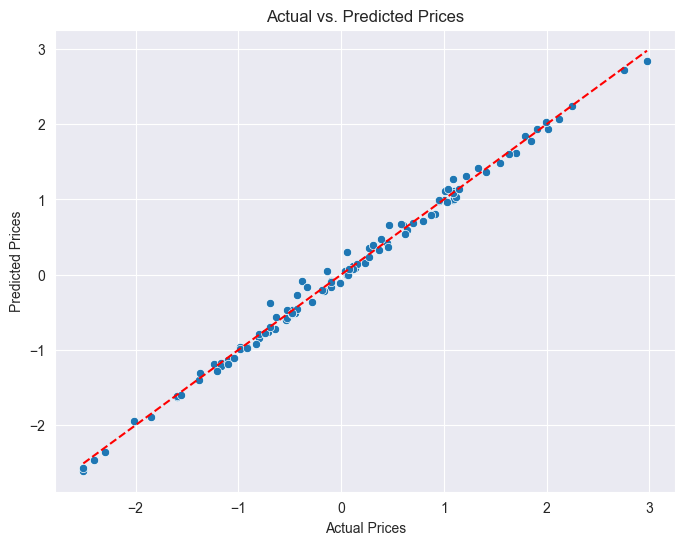

R-squared (R²) Score: 0.99


In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test data (this line is the same)
y_pred = lr_model.predict(X_test)

# Now, create the DataFrame for plotting using the 1D versions
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot using the new, clean DataFrame
plt.figure(figsize=(8, 6))
sns.scatterplot(data=results_df, x='Actual', y='Predicted')

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()],
         [results_df['Actual'].min(), results_df['Actual'].max()],
         color='red', linestyle='--')
plt.show()

# The R-squared calculation will also work correctly with these 1D versions
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²) Score: {r2:.2f}")

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_model = RandomForestRegressor( random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)

print("--- Final Model Performance Comparison ---")
print(f"Random Forest R-squared: {r2_rf:.4f}")

--- Final Model Performance Comparison ---
Random Forest R-squared: 0.9022
